[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


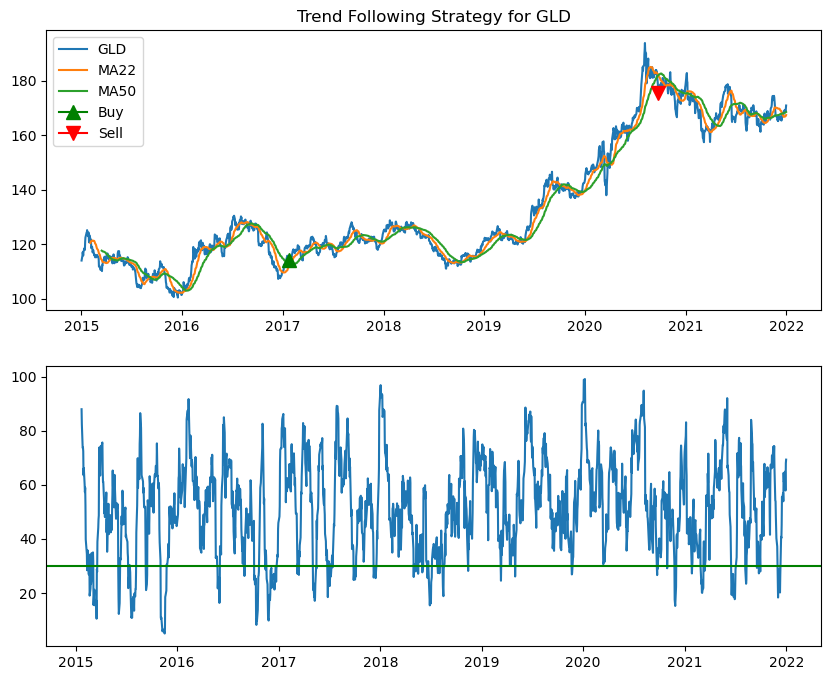

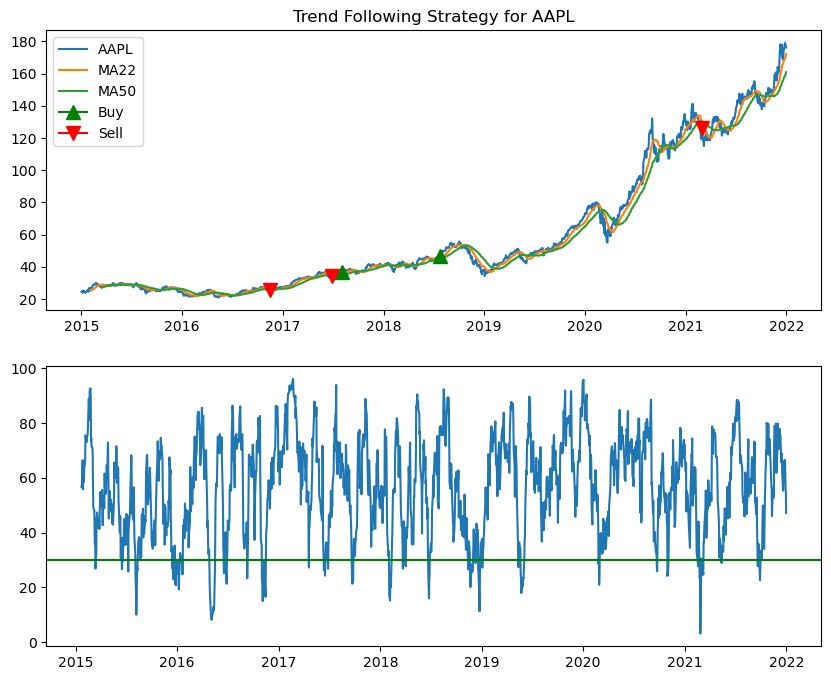

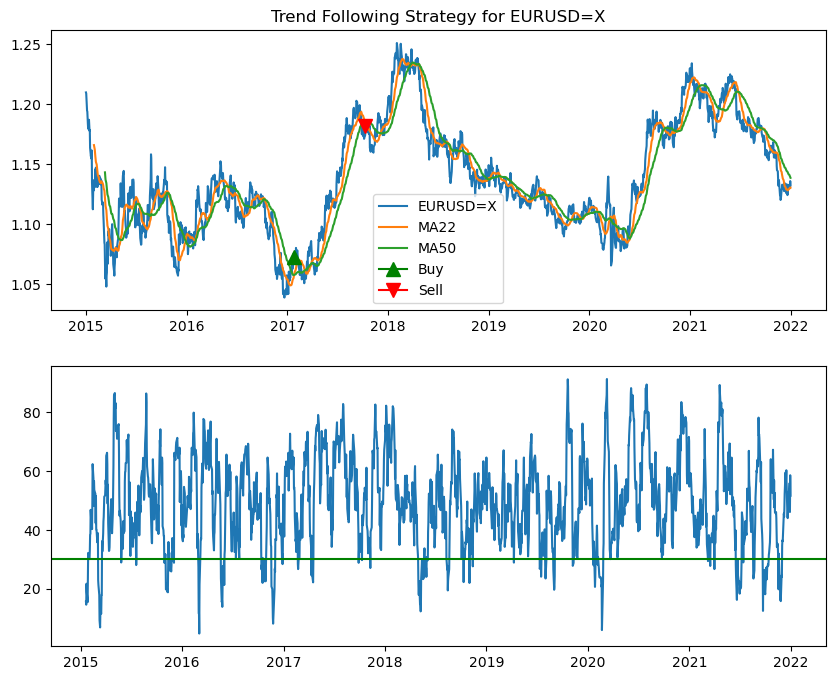

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

ticker_symbols = ['GLD', 'AAPL', 'EURUSD=X']
start_date = '2015-01-01'
end_date = '2022-01-01'

for ticker_symbol in ticker_symbols:
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    sma22 = stock_data['Adj Close'].rolling(window=22).mean()
    sma50 = stock_data['Adj Close'].rolling(window=50).mean()

    delta = stock_data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))

    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0
    signals['signal'][22:] = np.where(sma22[22:] > sma50[22:], 1.0, 0.0)

    signals['sell'] = np.where(rsi > 70, -1.0, 0.0)

    signals['buy'] = np.where(rsi < 30, 1.0, 0.0)

    signals['position'] = signals['signal'] + signals['sell'] + signals['buy']

    positions = signals['position'].diff()

    stock_data['Buy'] = np.where(positions == 2, stock_data['Adj Close'], np.nan)
    stock_data['Sell'] = np.where(positions == -2, stock_data['Adj Close'], np.nan)

    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
    ax1.plot(stock_data['Adj Close'], label=ticker_symbol)
    ax1.plot(sma22, label='MA22')
    ax1.plot(sma50, label='MA50')
    ax1.plot(stock_data['Buy'], marker='^', markersize=10, color='green', label='Buy')
    ax1.plot(stock_data['Sell'], marker='v', markersize=10, color='red', label='Sell')
    ax1.legend()
    ax1.set_title(f'Trend Following Strategy for {ticker_symbol}')
    ax2.plot(rsi, label='RSI')
    ax2.axhline(y=30, color='green')


[*********************100%***********************]  1 of 1 completed
New 22 day low on 2020-01-27 with a price of 77.23750305175781
New 55 day high on 2020-04-07 with a price of 64.85749816894531
New 22 day low on 2020-04-14 with a price of 71.76249694824219
New 22 day low on 2020-05-13 with a price of 76.9124984741211
New 22 day low on 2020-06-04 with a price of 80.58000183105469
New 22 day low on 2020-06-26 with a price of 88.40750122070312
New 22 day low on 2020-07-20 with a price of 98.35749816894531
New 22 day low on 2020-08-17 with a price of 114.60749816894531
New 22 day low on 2020-09-08 with a price of 112.81999969482422
New 22 day low on 2020-10-12 with a price of 124.4000015258789
New 55 day high on 2020-10-26 with a price of 115.05000305175781
New 22 day low on 2020-11-24 with a price of 115.16999816894531
New 22 day low on 2020-12-16 with a price of 127.80999755859375
New 22 day low on 2021-01-28 with a price of 137.08999633789062
New 55 day high on 2021-03-22 with a price

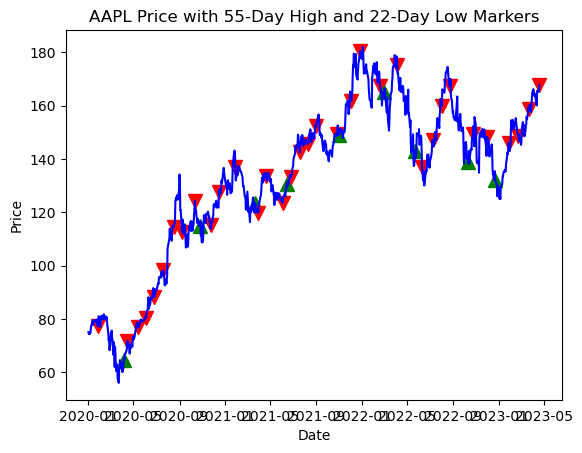

In [2]:
import datetime
import matplotlib.pyplot as plt

ticker_symbol = "AAPL"

data = yf.download(ticker_symbol, start="2020-01-01", end="2023-04-20")

max_price = data.iloc[0]['Close']
max_date = datetime.datetime.strptime(str(data.index[0]), '%Y-%m-%d %H:%M:%S').date()
min_price = data.iloc[0]['Close']
min_date = datetime.datetime.strptime(str(data.index[0]), '%Y-%m-%d %H:%M:%S').date()

for i in range(1, len(data)):
    current_date = datetime.datetime.strptime(str(data.index[i]), '%Y-%m-%d %H:%M:%S').date()
    if (current_date - max_date).days >= 55:
        print(f"New 55 day high on {current_date} with a price of {data.iloc[i]['Close']}")
        max_price = data.iloc[i]['Close']
        max_date = current_date
        plt.plot(current_date, max_price, 'g^', markersize=10)
    
    if (current_date - min_date).days >= 22:
        print(f"New 22 day low on {current_date} with a price of {data.iloc[i]['Close']}")
        min_price = data.iloc[i]['Close']
        min_date = current_date
        plt.plot(current_date, min_price, 'rv', markersize=10)
    
    if data.iloc[i]['Close'] > max_price:
        max_price = data.iloc[i]['Close']
        max_date = current_date
    elif data.iloc[i]['Close'] < min_price:
        min_price = data.iloc[i]['Close']
        min_date = current_date

    
plt.plot(data.index, data['Close'], color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"{ticker_symbol} Price with 55-Day High and 22-Day Low Markers")
plt.show()


In [3]:
import pandas as pd
import yfinance as yf
import datetime

ticker_list = ["AAPL", "MSFT", "AMZN", "META", "TSLA", "GOOGL", "BRK-B", "JPM", "JNJ", "V", "CL=F", "GC=F", "SI=F",
               "HG=F", "ZC=F", "ZS=F", "NG=F", "PA=F", "PL=F", "ALI=F", "EUR=X", "JPY=X", "GBP=X", "CHF=X",
               "CAD=X", "AUD=X", "NZD=X", "CNY=X", "HKD=X"]

start_date = '2015-01-01'
end_date = datetime.datetime.now()

results = []

for ticker_symbol in ticker_list:
    ticker_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    ticker_data["55_day_high"] = ticker_data["Close"].rolling(window=55).max()
    ticker_data["22_day_low"] = ticker_data["Close"].rolling(window=22).min()

    latest_date = ticker_data.index[-1].date()
    latest_price = ticker_data["Close"][-1]

    if latest_price >= ticker_data["55_day_high"][-1]:
        buy_sell_hold = "Buy"
    elif latest_price <= ticker_data["22_day_low"][-1]:
        buy_sell_hold = "Sell"
    else:
        buy_sell_hold = "Hold"

    results.append([latest_date, ticker_symbol, latest_price, buy_sell_hold])

table = pd.DataFrame(results, columns=["Date", "Ticker", "Price", "Buy/Sell/Hold"])

print(table)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
table


,Date,Ticker,Price,Buy/Sell/Hold
0,2023-05-08,AAPL,173.500000,Hold
1,2023-05-08,MSFT,308.649994,Hold
2,2023-05-08,AMZN,105.830002,Hold
3,2023-05-08,META,233.270004,Hold
4,2023-05-08,TSLA,171.789993,Hold
5,2023-05-08,GOOGL,107.769997,Hold
6,2023-05-08,BRK-B,326.140015,Hold
7,2023-05-08,JPM,137.070007,Hold
8,2023-05-08,JNJ,162.309998,Hold
9,2023-05-08,V,232.229996,Hold


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = table

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

plt.savefig('table.jpg', bbox_inches='tight', pad_inches=0.5)
plt.close()
